<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Modelos avanzados de minería de datos</p>
<p style="margin: 0; text-align:right;">20221 - Máster universitario en Ciencias de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicaciones</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
    <strong>Nombre y apellidos:</strong> Oriol Marco
</div>

# PEC 1: Preparación de datos

En esta práctica revisaremos y aplicaremos los conocimientos aprendidos en el **módulo 1**, donde nos centraremos en como aplicar diferentes técnicas para la carga y preparación de datos:

1. Carga de un conjunto de datos
2. Análisis de los datos
    - Análisis estadístico básico
    - Análisis exploratorio de los datos
3. Reducción de la dimensionalidad
4. Entrenamiento y test

<u>Consideraciones generales</u>: 

- La solución planteada no puede utilizar métodos, funciones o parámetros declarados **_deprecated_** en futuras versiones, a excepción de la carga de datos cómo se indica posteriormente.
- Esta PEC debe realizarse de forma **estrictamente individual**. Cualquier indicio de copia será penalizado con un suspenso (D) para todas las partes implicadas y la posible evaluación negativa de la asignatura de forma íntegra.
- Es necesario que el estudiante indique **todas las fuentes** que ha utilizado para la realización de la PEC. De no ser así, se considerará que el estudiante ha cometido plagio, siendo penalizado con un suspenso (D) y la posible evaluación negativa de la asignatura de forma íntegra.

<u>Formato de la entrega</u>:

- Algunos ejercicios puede suponer varios minutos de ejecución, por lo que la entrega debe hacerse en **formato notebook** y en **formato html**, donde se vea el código, los resultados y comentarios de cada ejercicio. Se puede exportar el notebook a HTML desde el menú File $\to$ Download as $\to$ HTML.
- Existe un tipo de celda especial para albergar texto. Este tipo de celda os será muy útil para responder a las diferentes preguntas teóricas planteadas a lo largo de la actividad. Para cambiar el tipo de celda a este tipo, en el menú: Cell $\to$ Cell Type $\to$ Markdown.

## 0. Carga de librerías

En la siguiente celda se deben cargar todas las librerías necesarias para la ejecución de la actividad. Se debe indicar y justificar el uso de librerías adicionales.

In [1]:
# Librerías básicas
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, make_scorer, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
seed = 100

%matplotlib inline

## 1. Carga del conjunto de datos (1 punto)

En primer lugar, deberéis cargar el conjunto de datos [Diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). 

Este conjunto de datos se puede descargar de Internet o puede ser cargado directamente de la librería `scikit-learn`, que incorpora un conjunto de [_datasets_](https://scikit-learn.org/stable/datasets.html) muy conocidos y empleados para minería de datos y aprendizaje automático.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Cargad el conjunto de datos **Diabetes** y mostrad:
- El número y nombre de los atributos
- El número de filas del conjunto de datos
- Verificad si hay _missing values_ y, en caso afirmativo, indicad en qué columnas se encuentran

In [2]:
diabetes = datasets.load_diabetes()

print("Elements of diabetes: ", diabetes.keys())

Elements of diabetes:  dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [3]:
print(diabetes["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
# desem els atributs i el target a les variables X i y

X = diabetes.data
y = diabetes.target

# Número de files

print("Number of rows X: ", X.shape[0])
print("Number of rows Y: ", y.shape[0])

# Número de columnes

print("Number of columns X: ", X.shape[1])

# Nombre de les columnes

l_feat_names = diabetes.feature_names
print("Columns with names: ", len(l_feat_names))
print("Columns names: ", l_feat_names)

Number of rows X:  442
Number of rows Y:  442
Number of columns X:  10
Columns with names:  10
Columns names:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [5]:
# Creem un dataframe amb les dades

df_diabetes = pd.concat([pd.DataFrame(X, columns=l_feat_names), 
                         pd.DataFrame(y, columns=["target"])], axis=1)

print("Number of rows: ", df_diabetes.shape[0], " and number of columns: ", df_diabetes.shape[1])
df_diabetes.head()

Number of rows:  442  and number of columns:  11


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [6]:
# Cerquem valors nuls o perduts

df_diabetes.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

# 2. Análisis de los datos (3 puntos)

## 2.1 Análisis estadístico básico

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Realizad un análisis estadístico básico, siguiendo los criterios descritos a continución:
- En el caso de las **variables categóricas**, realizad las siguientes operaciones para cada una de ellas:
    - Calculad la frecuencia
    - Haced un gráfico de barras
- En el caso de las **variables numéricas**, realizad las siguientes operaciones para cada una de ellas:
    - Calculad estadísticos descriptivos básicos, como la media, mediana, desviación estándard, etc.
    - Haced un histograma de valores
    
**Notas**:
- Podéis utilizar la librería `pandas` y sus funciones `describe` y  `value_counts`, así como las funciones  `bar` e `hist` de la librería `matplotlib`.

In [7]:
df_diabetes.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [8]:
df_diabetes.loc[df_diabetes["sex"] < 0, "sex"] = 0
df_diabetes.loc[df_diabetes["sex"] > 0, "sex"] = 1

freq = df_diabetes["sex"].value_counts()
freq

0.0    235
1.0    207
Name: sex, dtype: int64

Text(0.5, 1.0, 'Sex')

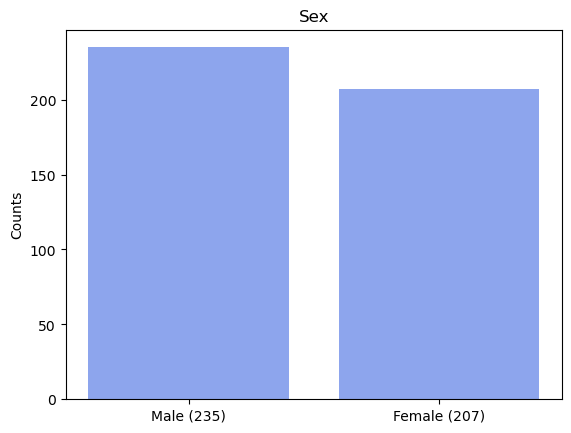

In [9]:
plt.bar(freq.index.values, freq, align='center', alpha=0.6, color=['royalblue'])

plt.xticks(freq.index.values, ('Male ('+str(df_diabetes["sex"].value_counts()[0])+')',
                   'Female ('+str(df_diabetes["sex"].value_counts()[1])+')'))

plt.ylabel('Counts')
plt.title('Sex')   

In [10]:
df_diabetes.drop(columns=['sex', 'target']).describe()

,age,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [11]:
df_diabetes.target.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

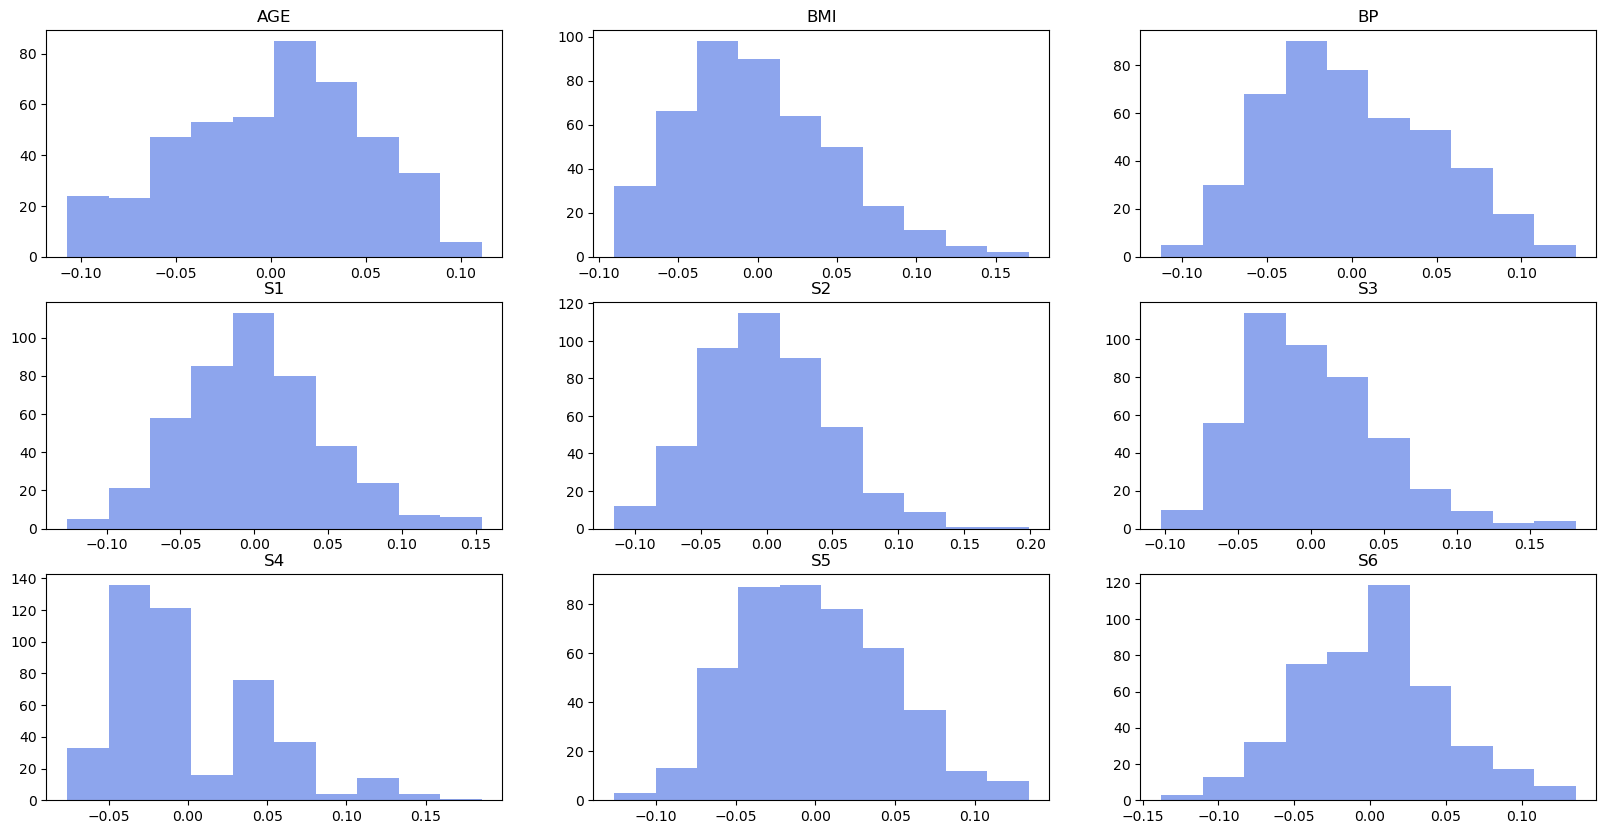

In [12]:
# Histograma
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

# Iterar con un solo indice
ax = ax.flatten()

for i, feature in enumerate(df_diabetes.drop(columns=['sex', 'target']).columns):
    ax[i].hist(df_diabetes[feature], alpha=0.6, color='royalblue', bins=10)
    ax[i].set_title(feature.upper())

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis</strong>
</div>

Comentad los resultados obtenidos.

La variable "sex" es la única variable categórica, presentando además una distribución uniforme entre sus dos posibles valores. El resto de variables, salvo "s4" que podría asemejarse a una poisson, siguen una distribución normal.

## 2.2 Análisis exploratorio de los datos

En este ejercicio exploraremos la relación de los atributos con la variable respuesta, mediante gráficos y analizando las correlaciones de los atributos numéricos.

In [13]:
response = "target"
cat_feats = "sex"
num_feats = ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
print('Respuesta (target)    :', response)
print("Atributos categóricos :", cat_feats)
print("Atributos numéricos   :", num_feats)

Respuesta (target)    : target
Atributos categóricos : sex
Atributos numéricos   : ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Calculad y mostrad la correlación entre todos los atributos numéricos y la variable de respuesta (o variable objetivo).

In [14]:
df_diabetes.corr()['target'].sort_values(ascending=False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441484
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

In [15]:
corr_all = df_diabetes[num_feats + [response]].corr()
corr_all.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\oriol\AppData\Local\Temp\ipykernel_17688\4234408769.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_all.style.background_gradient(cmap='coolwarm').set_precision(2)


,age,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.00,0.19,0.34,0.26,0.22,-0.08,0.20,0.27,0.30,0.19
bmi,0.19,1.00,0.40,0.25,0.26,-0.37,0.41,0.45,0.39,0.59
bp,0.34,0.40,1.00,0.24,0.19,-0.18,0.26,0.39,0.39,0.44
s1,0.26,0.25,0.24,1.00,0.90,0.05,0.54,0.52,0.33,0.21
s2,0.22,0.26,0.19,0.90,1.00,-0.20,0.66,0.32,0.29,0.17
s3,-0.08,-0.37,-0.18,0.05,-0.20,1.00,-0.74,-0.40,-0.27,-0.39
s4,0.20,0.41,0.26,0.54,0.66,-0.74,1.00,0.62,0.42,0.43
s5,0.27,0.45,0.39,0.52,0.32,-0.40,0.62,1.00,0.46,0.57
s6,0.30,0.39,0.39,0.33,0.29,-0.27,0.42,0.46,1.00,0.38
target,0.19,0.59,0.44,0.21,0.17,-0.39,0.43,0.57,0.38,1.00


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Representad gráficamente las relaciones entre todas las parejas de las variables numéricas (sin incluir la variable respuesta) del conjunto de datos. 

La finalidad de este ejercicio es poder observar y analizar las correlaciones de manera gráfica entre los pares de variables.

**Notas**:
- Podéis usar la función `pairplot` de la librería `seaborn`.

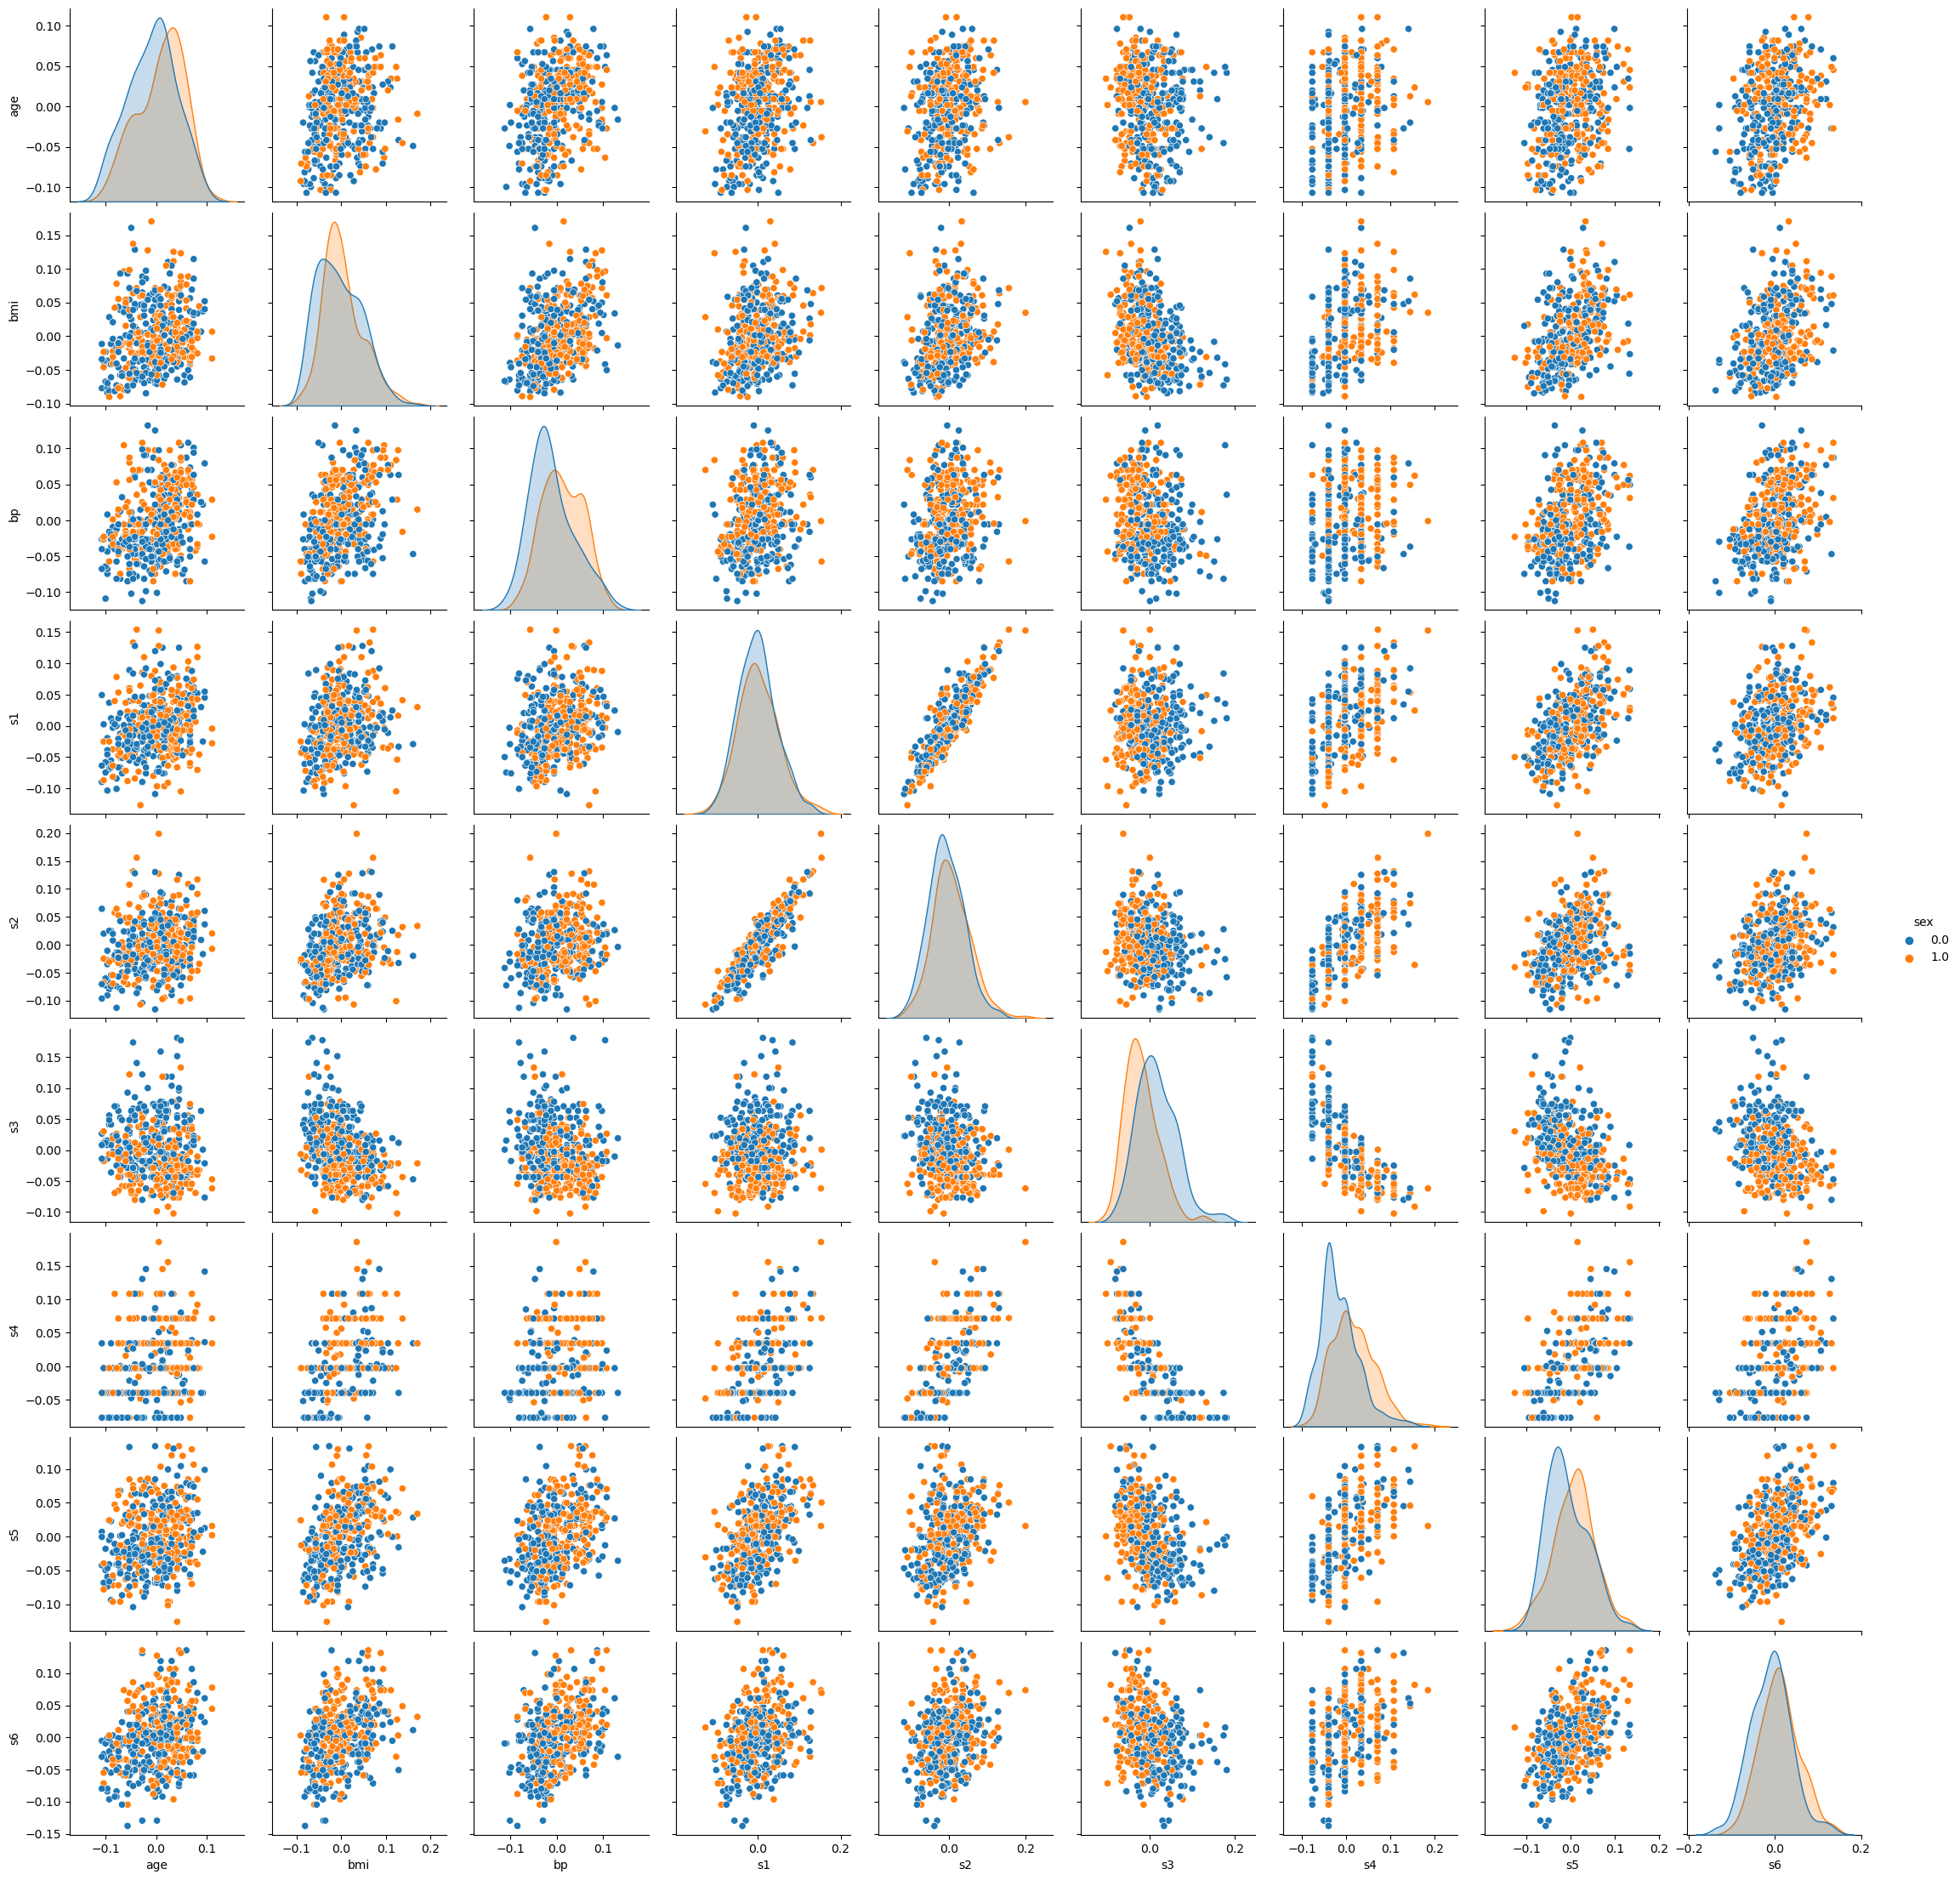

In [16]:
sns.pairplot(df_diabetes, 
            diag_kind= "kde", 
            hue= ('sex'),
            vars= num_feats
            )

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Identificad los 2 atributos que tienen una **correlación más fuerte** con la variable de respuesta, y los 2 con una **correlación más débil** (considerando el coeficiente de correlación mayor o menor en valor absoluto). 

Para observar y analizar las correlaciones gráficamente, representad, para cada uno de los 4 atributos identificados, un _scatter plot_ con el atributo en el eje X y la respuesta en el eje Y. Además, en cada gráfico añadid la representación de una regresión lineal que aproxime los puntos.

**Notas**: 
- Podéis usar la función `regplot` de la librería `seaborn`.

In [17]:
corr = df_diabetes.corr()
corr[['target']].sort_values(by=['target'], ascending=False).style.background_gradient()

,target
target,1.000000
bmi,0.586450
s5,0.565883
bp,0.441484
s4,0.430453
s6,0.382483
s1,0.212022
age,0.187889
s2,0.174054
sex,0.043062


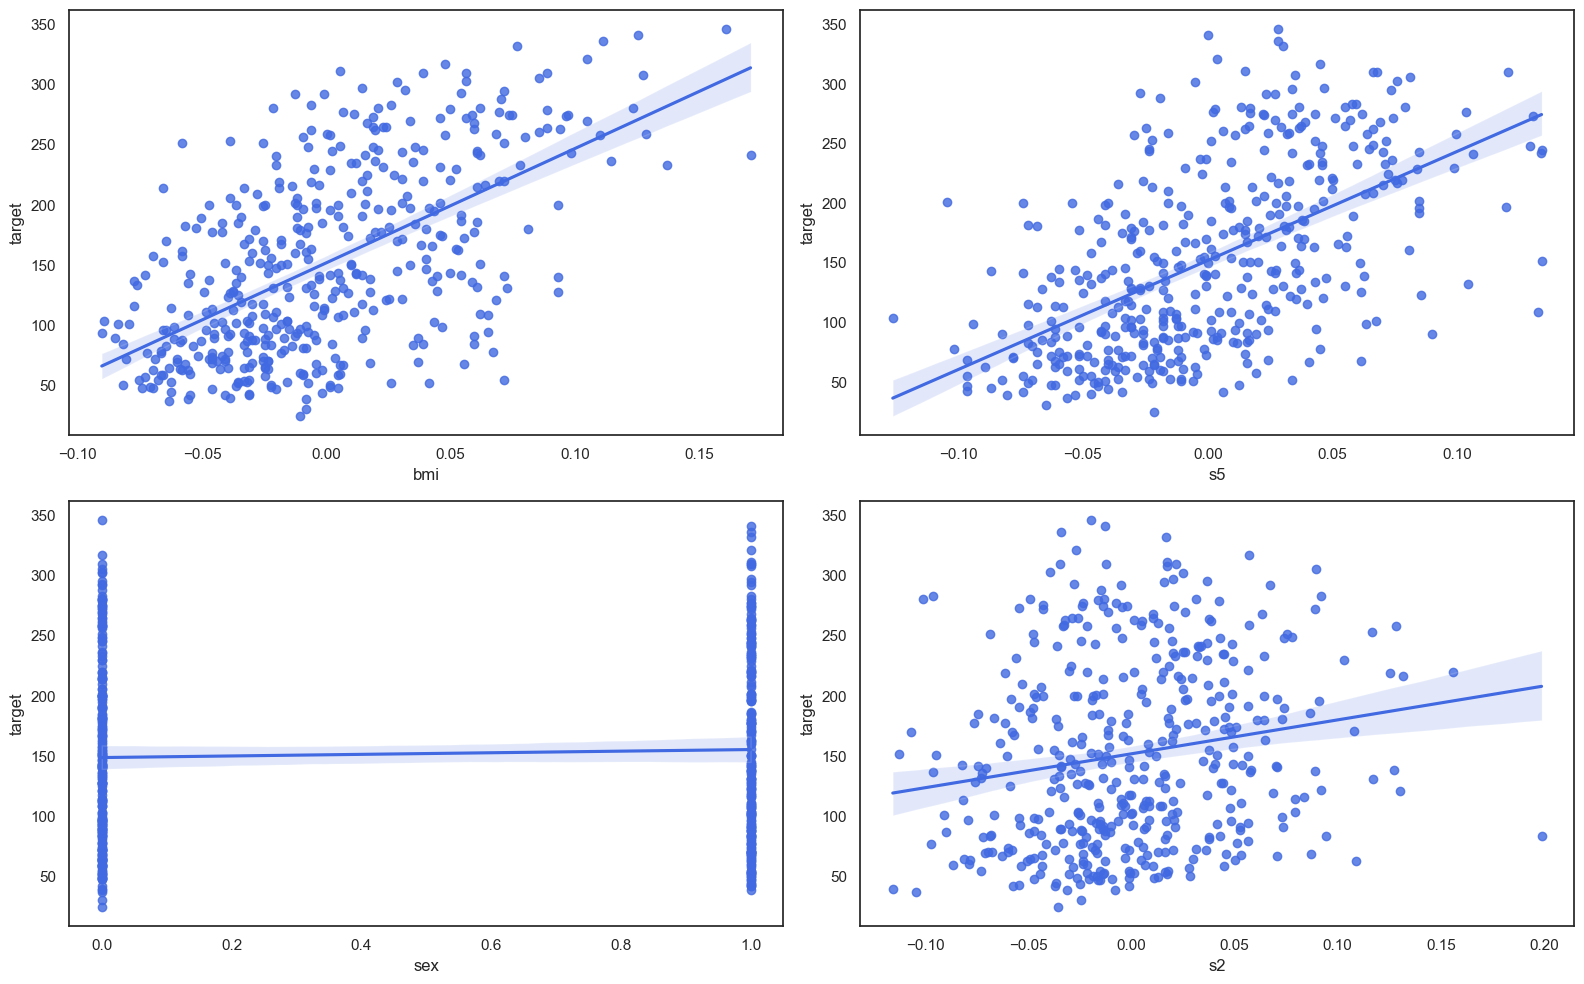

In [18]:
sns.set_theme(style="white", palette="pastel")
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 10))
axs = axs.flatten()
corr_vars = ['bmi', 's5', 'sex', 's2']

for i, var in enumerate(corr_vars):
    sns.regplot(x = var,
                y = 'target', 
                data = df_diabetes, 
                ax = axs[i],
                color='royalblue')
    
    #axs[i].set_title("Correlación con la variable objetivo", fontsize = 15)
    axs[i].set_xlabel(var, fontsize = 12)
    axs[i].set_ylabel('target', fontsize = 12)
plt.tight_layout()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis</strong>
</div>

Observando los gráficos, comentad brevemente si conseguís ver las altas o bajas correlaciones que habíais identificado numéricamente.

Para los atributos "bmi" y "s5", los gráficos muestran una alta correlación con la variable objetivo, como era de esperar.

Por otro lado, el atributo "sex" no muestra ninguna correlación con la variable objetivo, mientras que "s2" muestra gráficamente una baja correlación, tal como esperávamos.

# 3. Reducción de la dimensionalidad (3 puntos)

En este ejercicio se aplicarán métodos de reducción de la dimensionalidad al conjunto original de datos. El objetivo es reducir el conjunto de atributos a un nuevo conjunto con menos dimensiones, pero que contengan la máxima información posible presente en los atributos originales.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Relizad las siguientes acciones:
- Aplicad el método de reducción de la dimensionalidad **Principal Component Analysis** (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.

- Generad un **gráfico** con el resultado del PCA en el que se muestre, en función de los valores de las dos componentes en los ejes X e Y, el valor de la respuesta (_target_) usando la escala de colores. El objetivo es visualizar la variación del atributo objetivo en función de los valores de las componentes principales generadas.

**Nota**: 
- Vigilad de no incluir la variable objetivo en la reducción de dimensionalidad, dado que queremos poder explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.
- No es necesario que programéis el algoritmo de PCA, podéis usar la implementación disponible en la librería de `scikit-learn`.
- Podéis usar el _scatter plot_ de `matplotlib` con el parámetro `c`, que indica el color de los puntos, igual a la variable objetivo para generar el gráfico.

In [19]:
X = df_diabetes.drop(columns =[response])

y = df_diabetes[response].values

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
pca = PCA(n_components=2, random_state=seed)
X_pca = pca.fit_transform(X_scaled)

print("Dimensions de les dades reduïdes amb PCA:", np.shape(X_pca))
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

Dimensions de les dades reduïdes amb PCA: (442, 2)
Explained variance ratio (first two components): [0.40242142 0.14923182]


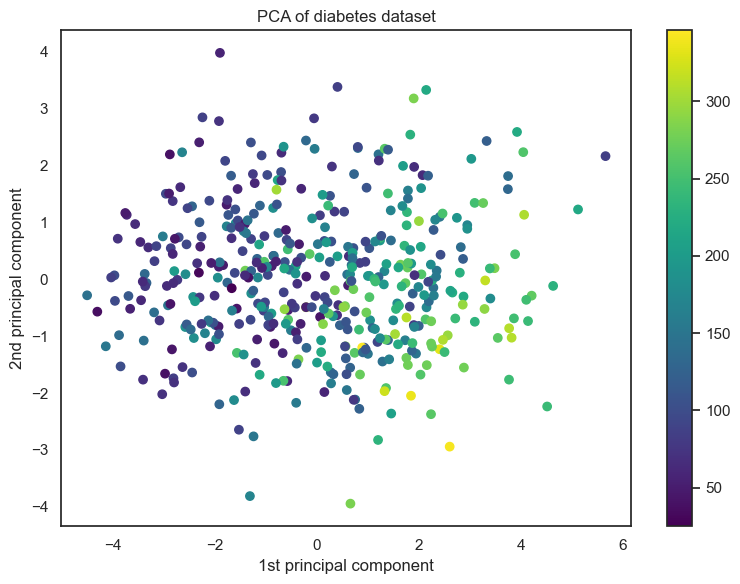

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

scatter = ax.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=y, cmap='viridis')
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.set_title('PCA of diabetes dataset')

colorbar = plt.colorbar(scatter)

plt.tight_layout()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Relizad las siguientes operaciones:
- Repetid la reducción de dimensionalidad, pero en este caso usando **TSNE**. Podéis encontrar más información sobre este algoritmo en el link: https://distill.pub/2016/misread-tsne/
- Igual que antes, generad un gráfico con el resultado del TSNE en el que se muestre, en función de los valores de las 2 nuevas dimensiones en los ejes X e Y, el valor de la respuesta (_target_) usando una escala de colores.

**Nota**:
- No es necesario que programéis el algoritmo TSNE, podéis usar la implementación disponible en la librería de `scikit-learn`.
- A parte de especificar el número de componentes, probad a usar los parámetros `learning_rate` y `perplexity`.
- Podéis usar el _scatter plot_ de `matplotlib` con el parámetro `c`, que indica el color de los puntos, igual a la variable objetivo para generar el gráfico.

In [31]:
tsne = TSNE(n_components=2, random_state=seed, perplexity=40, init='random', learning_rate=150)
X_tsne = tsne.fit_transform(X_scaled)

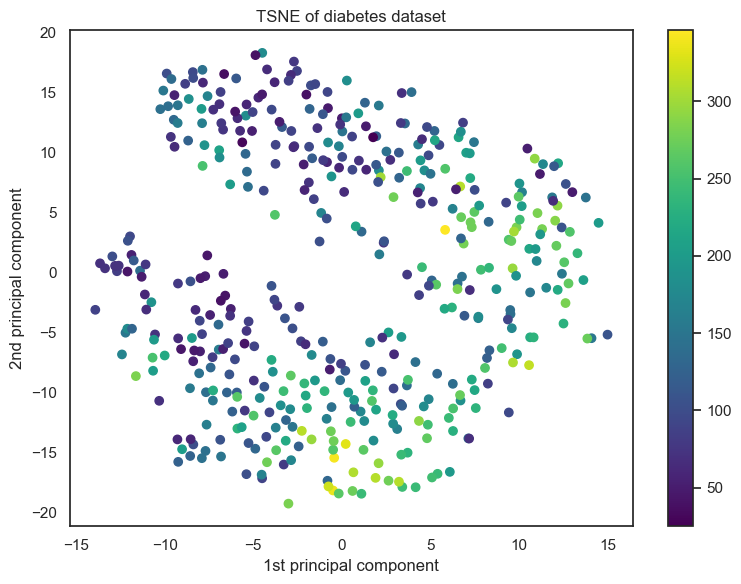

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

scatter = ax.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], c=y, cmap='viridis')
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.set_title('TSNE of diabetes dataset')

colorbar = plt.colorbar(scatter)

plt.tight_layout()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis</strong>
</div>

Observando los dos gráficos, responded a las siguinetes preguntas:
- ¿Creéis que ha funcionado bien la reducción de dimensionalidad? ¿Os parece que las 2 nuevas dimensiones consiguen explicar la variación del atributo objetivo y visualizarlo de forma adecuada? 
- ¿Si utilizásemos las 2 nuevas variables para predecir el valor objetivo, con cuál de los dos métodos de reducción de dimensionalidad creéis que obtendríamos los mejores resultados? ¿Por qué obtenemos resultados tan diferentes con los dos métodos?

Los dos métodos son muy diferentes, ya que uno reduce la dimensionalidad basandose en minimizar las distancias (PCA), mientras que el otro se basa en mantener la relación de distancias en alta y baja dimensionalidad (TSNE).

En ambos casos vemos que el valor del objetivo varía en función del valor de las 2 nuevas dimensiones. El método PCA permite separar más claramente el atributo objetivo, que depende en gran medida del primer componente.

# 4 Entrenamiento y métricas (3 puntos)

## 4.a Regresión

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el **Random Forest** para regresión, para predecir el valor objetivo (_target_) y evaluar la precisión obtenida con el modelo.

Para eso usaremos el conjunto de datos original con todos los atributos menos la variable dependiente (target).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Usando el conjunto de datos original:
- Definid un modelo Random Forest (fijando `n_estimators=10` para mantener el modelo simple y `random_state=seed`).
- Aplicad validación cruzada con el modelo definido y el dataset de train (con `cv=5` ya es suficiente).
- Como métrica para cuantificar el error del modelo, utilizad tanto MAE (la media del error absoluto), MSE (error cuadrático medio) y MAPE (porcentaje de error absoluto medio), separadamente.
- Calculad la media y la desviación estándard del error obtenido en cada caso.

**Notas**:
- Para entrenar un modelo random forest podéis usar `RandomForestRegressor` de `sklearn`.
- Para aplicar validación cruzada podéis usar `cross_val_score` de `sklearn`, y modificar su parámetro `scoring` si fuese necesario.

In [36]:
clf = RandomForestRegressor(n_estimators=10, random_state=seed)

scores = cross_val_score(clf, X, y, cv=5, scoring=make_scorer(mean_absolute_error))
mean_data = np.abs(np.mean(scores))
std_data = np.std(scores)
print('mean MAE score: {:.1f}, std: {:.1f}, 1std score range: {:.1f} - {:.1f}'.format(mean_data, std_data, mean_data - std_data, mean_data + std_data))

scores = cross_val_score(clf, X, y, cv=5, scoring=make_scorer(mean_squared_error))
mean_data = np.abs(np.mean(scores))
std_data = np.std(scores)
print('mean MSE score: {:.1f}, std: {:.1f}, 1std score range: {:.1f} - {:.1f}'.format(mean_data, std_data, mean_data - std_data, mean_data + std_data))

scores = cross_val_score(clf, X, y, cv=5, scoring=make_scorer(mean_absolute_percentage_error))
mean_data = np.abs(np.mean(scores))
std_data = np.std(scores)
print('mean MAPE score: {:.1f}, std: {:.1f}, 1std score range: {:.1f} - {:.1f}'.format(mean_data, std_data, mean_data - std_data, mean_data + std_data))



mean MAE score: 48.4, std: 2.1, 1std score range: 46.3 - 50.5
mean MSE score: 3640.9, std: 289.5, 1std score range: 3351.4 - 3930.4
mean MAPE score: 0.4, std: 0.0, 1std score range: 0.4 - 0.5


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis</strong>
</div>

¿A qué se deben las diferencias numéricas entre las distintas métricas?

¿Qué muestras y errores crees que pueden influir más o menos en el incremento/decremento de las distintas métricas?

Tanto MAE como MSE son simétricas, por lo que no hay más error si el fallo es de infra o sobreestimación. Sin embargo, MAPE no lo es, así si el valor real es de 3 y la predicción es de 2, su error asociado es de 0.33. Mientras que si es al reves, se predice 3 cuando el valor real es 2, el error es de 0.5.

Por otro lado, el MAE tiene una progresión lineal, mientras que el MSE penalizará más los errores mayores, por lo que puede crecer muy rápidamente simplemente con un pequeño conjunto de muestras si su error es grande.

Por último, el MAPE es relativo y sensible cuando hay poco error en valores muy bajos, ya que aunque a nivel absoluto no sea un gran error, a nivel relativo puede serlo. Por ejemplo si el valor real es 2 y la predicción es de 3. A nivel absoluto la diferencia es 1, pero en relativo 0.5. Mientras que si el valor real es 1000 y la predicción es 1001, el error absoluto sigue siendo 1, pero el relativo es de 0.001.

## 4.b Clasificación

Para este apartado se usará el conjunto de datos original pero como target (y) la variable "sex" (binaria, con valores 0 y 1), transformando el problema de regresión a clasificación.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Genera el conjunto de variables independientes _X_ con los datos originales pero sin la variable _target_ ni _sex_ (será la nueva variable dependiente).

Genera la variable dependiente _y_ como un array de tipo _int_ que contenga el sexo asociado a cada fila para ser predicho.

In [37]:
X = df_diabetes.drop(columns=['target', 'sex']).values
y = df_diabetes['sex'].astype(int)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

- Definid un modelo Random Forest (fijando `n_estimators=10` para mantener el modelo simple y `random_state=seed`).
- Aplicad validación cruzada con el modelo definido y el dataset de train (con `cv=5` ya es suficiente).
- Como métrica para cuantificar el error del modelo, utilizad tanto accuracy como roc_auc.
- Calculad la media y la desviación estándard de las métricas obtenidas en cada caso.

**Notas**:
- Para entrenar un modelo random forest podéis usar `RandomForestClassifier` de `sklearn`.
- Para aplicar validación cruzada podéis usar `cross_val_score` de `sklearn`, y modificar su parámetro `scoring` si fuese necesario.

In [38]:
clf = RandomForestClassifier(n_estimators=10)

scores = cross_val_score(clf, X, y, cv=5, scoring=make_scorer(accuracy_score))
mean_data = np.abs(np.mean(scores))
std_data = np.std(scores)
print('Accuracy score: {:.1f}, std: {:.1f}, 1std score range: {:.1f} - {:.1f}'.format(mean_data, std_data, mean_data - std_data, mean_data + std_data))

scores = cross_val_score(clf, X, y, cv=5, scoring=make_scorer(roc_auc_score))
mean_data = np.abs(np.mean(scores))
std_data = np.std(scores)
print('ROC AUC score: {:.1f}, std: {:.1f}, 1std score range: {:.1f} - {:.1f}'.format(mean_data, std_data, mean_data - std_data, mean_data + std_data))

Accuracy score: 0.7, std: 0.0, 1std score range: 0.6 - 0.7
ROC AUC score: 0.7, std: 0.0, 1std score range: 0.6 - 0.7


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis</strong>
</div>

Si los valores de la columna _sex_ estuviesen desbalanceados con un 99% de ceros y un 1% de unos.

Para las dos métricas anteriores, ¿qué score obtendríamos con un modelo que siempre indicase 0?

En el caso de accuracy 0.99 ya que acierta ese tanto por uno de veces. Mientras que con el AUC de la ROC obtendrías 0.5 ya que es equivalente a un modelo aleatorio.